In [88]:
# 📚 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# 🗂️ Load the Dataset
df = pd.read_csv('Unisys_Large_Dataset_Modified_v2.csv')
df

,Year,Quarter,Region,Business Unit,Revenue (Million USD),Operating Income (Million USD),Net Income (Million USD),Employee Count
0,2020,Q1,North America,Digital Workplace,103.38,7.66,-4.50,1018
1,2020,Q1,North America,Cloud Solutions,297.37,31.95,17.90,1901
2,2020,Q1,North America,Enterprise Computing,287.18,48.32,41.36,338
3,2020,Q1,Europe,Digital Workplace,66.52,6.28,-8.82,1594
4,2020,Q1,Europe,Cloud Solutions,238.82,35.50,29.03,1547
...,...,...,...,...,...,...,...,...
235,2024,Q4,Asia-Pacific,NaN,218.22,31.58,25.29,678
236,2024,Q4,Asia-Pacific,Enterprise Computing,120.81,17.87,12.36,638
237,2024,Q4,India,Digital Workplace,232.69,33.23,26.82,219
238,2024,Q4,India,Cloud Solutions,195.45,37.71,19.66,1040


In [89]:

# 📋 Basic Overview
print("\n🔎 Dataset Info:")
print(df.info())



🔎 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            240 non-null    int64  
 1   Quarter                         240 non-null    object 
 2   Region                          240 non-null    object 
 3   Business Unit                   216 non-null    object 
 4   Revenue (Million USD)           228 non-null    float64
 5   Operating Income (Million USD)  240 non-null    float64
 6   Net Income (Million USD)        240 non-null    float64
 7   Employee Count                  240 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB
None


In [90]:

print("\n🧹 Missing Values:")
print(df.isnull().sum())



🧹 Missing Values:
Year                               0
Quarter                            0
Region                             0
Business Unit                     24
Revenue (Million USD)             12
Operating Income (Million USD)     0
Net Income (Million USD)           0
Employee Count                     0
dtype: int64


In [91]:

print("\n🧮 Summary Statistics:")
print(df.describe())



🧮 Summary Statistics:
              Year  Revenue (Million USD)  Operating Income (Million USD)  \
count   240.000000             228.000000                      240.000000   
mean   2022.000000             171.506754                       21.467917   
std       1.417169              72.848004                       12.571864   
min    2020.000000              51.130000                        3.370000   
25%    2021.000000             104.672500                       11.765000   
50%    2022.000000             171.625000                       18.080000   
75%    2023.000000             233.940000                       29.717500   
max    2024.000000             297.390000                       54.490000   

       Net Income (Million USD)  Employee Count  
count                240.000000      240.000000  
mean                   9.122542     1120.154167  
std                   13.825551      499.512546  
min                  -16.560000      206.000000  
25%                   -0.692500  

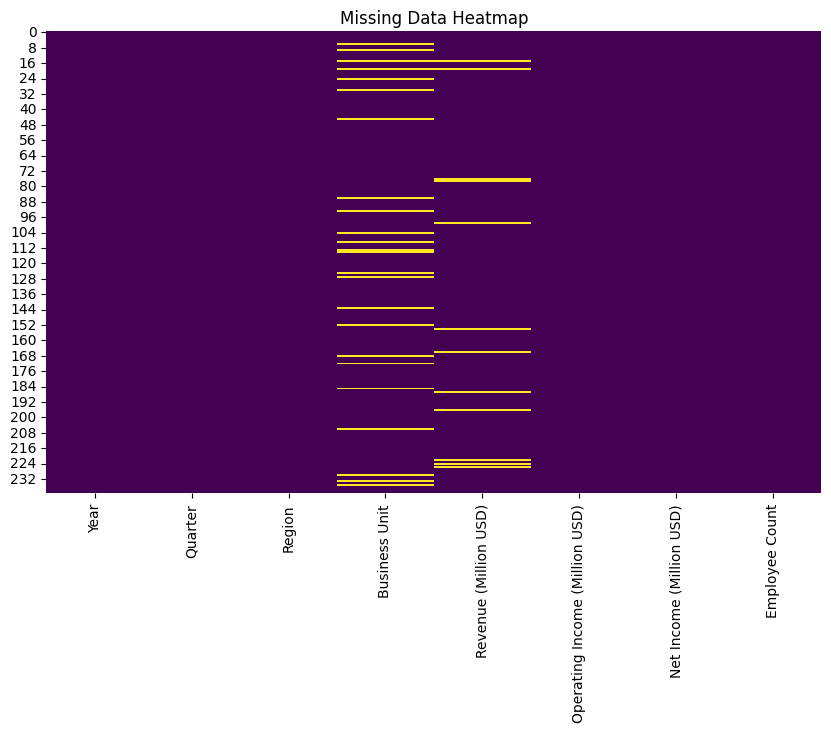

In [92]:

# 📊 Visualizing Missing Data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [93]:

# 🔵 Handling Missing Values
# Numerical Column ➔ Median Imputation
num_imputer = SimpleImputer(strategy='median')
df['Revenue'] = num_imputer.fit_transform(df[['Revenue (Million USD)']])
df['Operating Income'] = df['Operating Income (Million USD)']  # Rename
df['Net Income'] = df['Net Income (Million USD)']  # Rename


In [94]:

# Categorical Column ➔ Most Frequent Imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
df['Business Unit'] = cat_imputer.fit_transform(df[['Business Unit']]).ravel()


In [95]:

# Drop old columns with (Million USD) names
df.drop(columns=['Revenue (Million USD)', 'Operating Income (Million USD)', 'Net Income (Million USD)'], inplace=True)


In [96]:

# ✅ Check after Imputation
print("\n✅ Missing Values After Imputation:")
print(df.isnull().sum())



✅ Missing Values After Imputation:
Year                0
Quarter             0
Region              0
Business Unit       0
Employee Count      0
Revenue             0
Operating Income    0
Net Income          0
dtype: int64


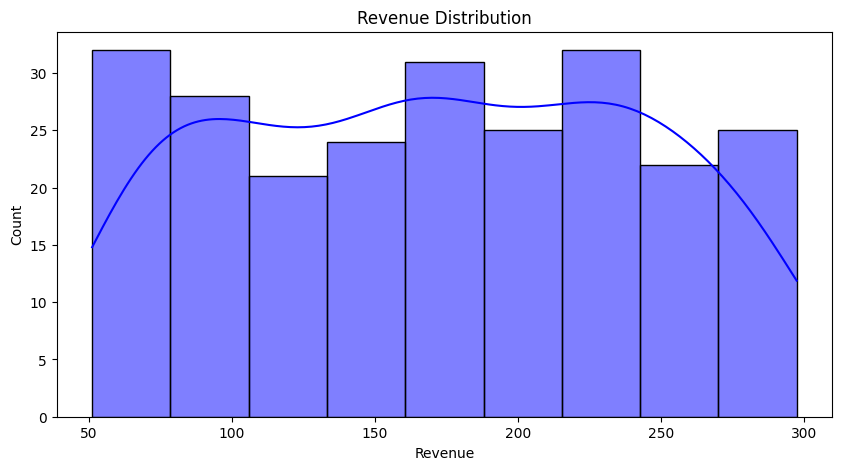

In [97]:

# 📈 Data Distributions

# Revenue Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Revenue'], kde=True, color='blue')
plt.title('Revenue Distribution')
plt.show()


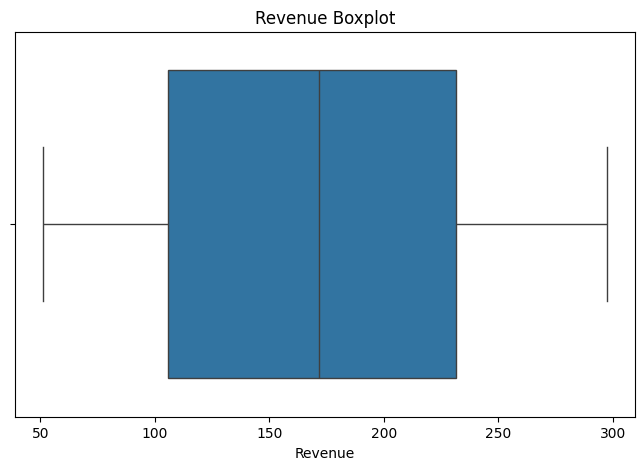

In [98]:

# Boxplot for Revenue
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Revenue'])
plt.title('Revenue Boxplot')
plt.show()


In [99]:

# 🧹 Remove Revenue Outliers
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['Revenue'] >= lower) & (df['Revenue'] <= upper)]

print("\n✅ Dataset Shape After Removing Outliers:", df.shape)



✅ Dataset Shape After Removing Outliers: (240, 8)


In [100]:

# 🔖 Save the Cleaned Data
df.to_csv('Unisys_Cleaned_Dataset.csv', index=False)
print("\n💾 Cleaned Data Saved as: Unisys_Cleaned_Dataset.csv")



💾 Cleaned Data Saved as: Unisys_Cleaned_Dataset.csv


Model Training and Deployment

In [101]:
# 📚 Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import joblib

# 🗂️ Load Cleaned Data
df2 = pd.read_csv('Unisys_Cleaned_Dataset.csv')


In [102]:

# 🎯 Features & Target
X = df2.drop(['Revenue', 'Operating Income', 'Net Income'], axis=1)
y = df2[['Revenue', 'Operating Income', 'Net Income']]


In [103]:

# 🔵 Preprocessing
categorical_features = ['Quarter', 'Region', 'Business Unit']
numeric_features = ['Year', 'Employee Count']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')


In [104]:

# 🛠 Define Base Model
base_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))


In [105]:

# ✂️ Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [106]:

# 🧪 Define Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', base_model)
])


In [107]:

# 🔍 GridSearchCV
param_grid = {
    'regressor__estimator__n_estimators': [100, 200],
    'regressor__estimator__max_depth': [10, 20, None],
    'regressor__estimator__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)


In [110]:

# 🔥 Train
grid_search.fit(X_train, y_train)

print("\n✅ Best Parameters Found:", grid_search.best_params_)
print("\n✅ Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits

✅ Best Parameters Found: {'regressor__estimator__max_depth': 10, 'regressor__estimator__min_samples_split': 5, 'regressor__estimator__n_estimators': 200}

✅ Best Score: -0.13933249039706866


In [111]:
joblib.dump(grid_search.best_estimator_, 'unisys_multioutput_model.pkl')
print("\n✅ Tuned Model saved as: unisys_multioutput_model.pkl")


✅ Tuned Model saved as: unisys_multioutput_model.pkl


Streamlit Code

In [112]:
# 📚 Import Libraries
import streamlit as st
import pandas as pd
import joblib

# 💾 Load the saved model
model = joblib.load('unisys_multioutput_model.pkl')


In [ ]:

# 🎯 Title
st.title('🔮 Unisys Business Forecasting App')

st.write("""
This app predicts:
- **Revenue (Million USD)**
- **Operating Income (Million USD)**
- **Net Income (Million USD)**
based on user inputs.
""")

# 🧩 Input Features
st.header("🛠️ Input Features")

year = st.number_input('Year', min_value=2020, max_value=2026, value=2024, step=1)

quarter = st.selectbox('Quarter', ['Q1', 'Q2', 'Q3', 'Q4'])

region = st.selectbox('Region', ['North America', 'Europe', 'Asia-Pacific', 'India'])

business_unit = st.selectbox('Business Unit', ['Digital Workplace', 'Cloud Solutions', 'Enterprise Computing'])

employee_count = st.number_input('Employee Count', min_value=100, max_value=3000, value=1000, step=1)

# 📦 Collect inputs into a DataFrame
input_data = pd.DataFrame({
    'Year': [year],
    'Quarter': [quarter],
    'Region': [region],
    'Business Unit': [business_unit],
    'Employee Count': [employee_count]
})

# 🔮 Predict
if st.button('Predict'):
    prediction = model.predict(input_data)
    revenue, operating_income, net_income = prediction[0]
    
    st.success('🎯 Prediction Results:')
    st.write(f"**Revenue (Million USD):** {revenue:.2f}")
    st.write(f"**Operating Income (Million USD):** {operating_income:.2f}")
    st.write(f"**Net Income (Million USD):** {net_income:.2f}")
